In [2]:
# Import necessary libraries
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to create a CNN model with varying kernel sizes and padding
def create_model(kernel_size):
    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_size, activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, kernel_size, activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, kernel_size, activation='relu', padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Define kernel sizes to test
kernel_sizes = [(3, 3), (5, 5), (7, 7)]

# Train and evaluate models with different kernel sizes
results = {}
for kernel_size in kernel_sizes:
    print(f"\nTraining model with kernel size: {kernel_size}")
    model = create_model(kernel_size)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=2)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
    results[kernel_size] = {'loss': test_loss, 'accuracy': test_accuracy}

# Print the results for comparison
for kernel_size, metrics in results.items():
    print(f"Kernel Size {kernel_size}: Test Accuracy = {metrics['accuracy']:.4f}, Test Loss = {metrics['loss']:.4f}")



Training model with kernel size: (3, 3)
Epoch 1/5
1563/1563 - 106s - 68ms/step - accuracy: 0.4878 - loss: 1.4162 - val_accuracy: 0.5854 - val_loss: 1.1571
Epoch 2/5
1563/1563 - 105s - 67ms/step - accuracy: 0.6408 - loss: 1.0178 - val_accuracy: 0.6582 - val_loss: 0.9846
Epoch 3/5
1563/1563 - 140s - 90ms/step - accuracy: 0.6988 - loss: 0.8576 - val_accuracy: 0.6903 - val_loss: 0.8900
Epoch 4/5
1563/1563 - 142s - 91ms/step - accuracy: 0.7366 - loss: 0.7534 - val_accuracy: 0.6963 - val_loss: 0.8889
Epoch 5/5
1563/1563 - 143s - 92ms/step - accuracy: 0.7661 - loss: 0.6659 - val_accuracy: 0.7285 - val_loss: 0.8193
313/313 - 5s - 17ms/step - accuracy: 0.7285 - loss: 0.8193

Training model with kernel size: (5, 5)
Epoch 1/5
1563/1563 - 229s - 146ms/step - accuracy: 0.4676 - loss: 1.4615 - val_accuracy: 0.5805 - val_loss: 1.1762
Epoch 2/5
1563/1563 - 225s - 144ms/step - accuracy: 0.6315 - loss: 1.0460 - val_accuracy: 0.6585 - val_loss: 0.9607
Epoch 3/5
1563/1563 - 225s - 144ms/step - accuracy: 

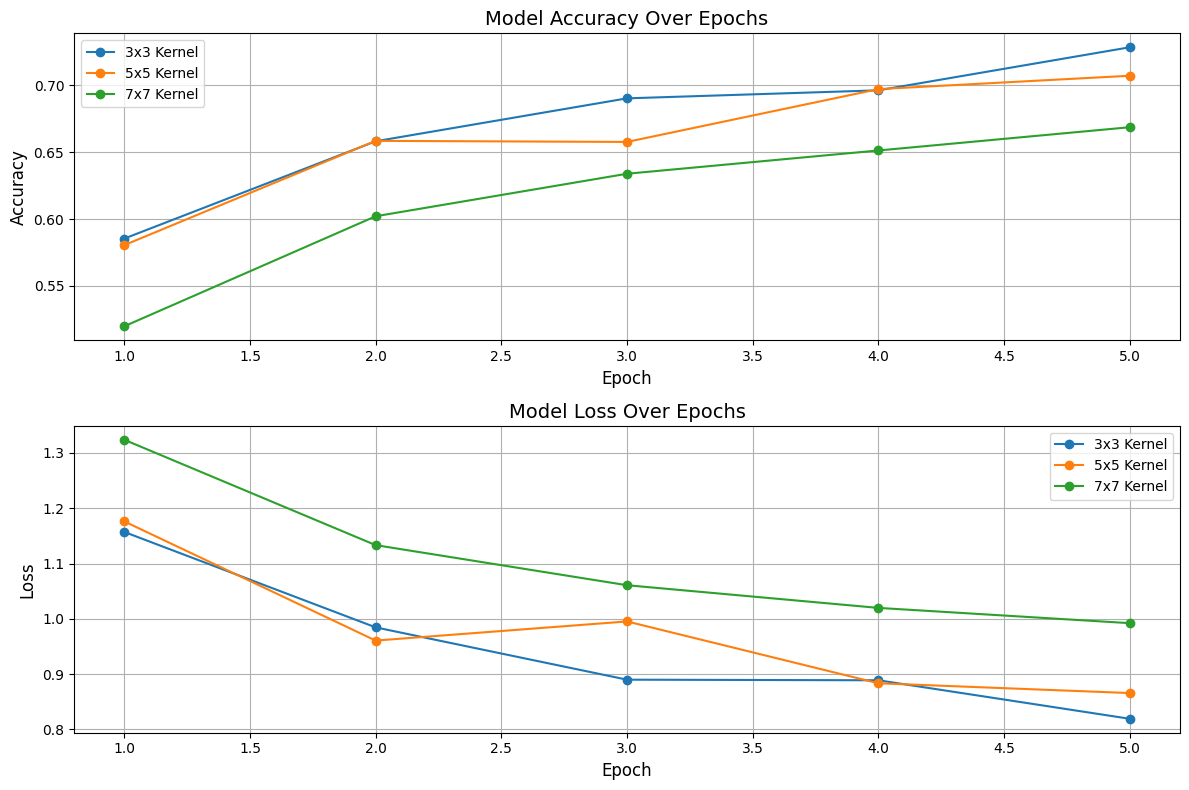

In [4]:
import matplotlib.pyplot as plt

# Epochs data for visualization
epochs = range(1, 6)

# Accuracy and Loss values for each kernel size
accuracy_3x3 = [0.5854, 0.6582, 0.6903, 0.6963, 0.7285]
accuracy_5x5 = [0.5805, 0.6585, 0.6577, 0.6972, 0.7072]
accuracy_7x7 = [0.5198, 0.6021, 0.6339, 0.6513, 0.6687]

loss_3x3 = [1.1571, 0.9846, 0.8900, 0.8889, 0.8193]
loss_5x5 = [1.1762, 0.9607, 0.9953, 0.8835, 0.8658]
loss_7x7 = [1.3238, 1.1333, 1.0608, 1.0198, 0.9922]

# Create figure
plt.figure(figsize=(12, 8))

# Plot Accuracy
plt.subplot(2, 1, 1)
plt.plot(epochs, accuracy_3x3, label='3x3 Kernel', marker='o')
plt.plot(epochs, accuracy_5x5, label='5x5 Kernel', marker='o')
plt.plot(epochs, accuracy_7x7, label='7x7 Kernel', marker='o')
plt.title('Model Accuracy Over Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(2, 1, 2)
plt.plot(epochs, loss_3x3, label='3x3 Kernel', marker='o')
plt.plot(epochs, loss_5x5, label='5x5 Kernel', marker='o')
plt.plot(epochs, loss_7x7, label='7x7 Kernel', marker='o')
plt.title('Model Loss Over Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()
